In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
from sklearn.cluster import KMeans

In [2]:
data=pd.read_csv("UniversalBank.csv")

In [3]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [4]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
data.shape

(5000, 14)

In [6]:
data.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [7]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [8]:
##converting all these into categorical variables
data['Education']=data['Education'].astype("category")
data['Family']=data['Family'].astype("category")
data['ZIP Code']=data['ZIP Code'].astype("category")



In [9]:
#data.drop(['ID'],axis=1,inplace=True)
data.drop(labels=['ID'],axis=1,inplace=True)

In [10]:
##dropping the persons with neg expeerience
data=data.loc[data.Experience>=0,:]

In [11]:
data.describe()

,Age,Experience,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000
mean,45.557195,20.331043,73.814470,1.935926,56.634398,0.097009,0.104285,0.061035,0.597009,0.294058
std,11.320735,11.311973,46.112596,1.747694,101.828885,0.296000,0.305660,0.239418,0.490549,0.455664
min,24.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,10.750000,39.000000,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.000000,20.000000,64.000000,1.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,2.600000,101.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,67.000000,43.000000,224.000000,10.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
data['Family'].value_counts()

1    1470
2    1274
4    1203
3    1001
Name: Family, dtype: int64

In [13]:
data.Education.value_counts()

1    2080
3    1481
2    1387
Name: Education, dtype: int64

In [14]:
data['ZIP Code'].value_counts()

94720    164
94305    125
95616    115
90095     71
93106     56
        ... 
94965      1
94598      1
94404      1
94087      1
9307       1
Name: ZIP Code, Length: 467, dtype: int64

In [15]:
##Dropping ZIP Code as it has many values.we can use first two or three digits to 
## extract more information
del data['ZIP Code']

In [16]:
data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [17]:
data.corr()

,Age,Experience,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994101,-0.058006,-0.050879,-0.015184,-0.014204,0.000496,0.003261,0.013542,0.007496
Experience,0.994101,1.000000,-0.049245,-0.048939,-0.013459,-0.014121,-0.000457,0.005450,0.013518,0.008876
Income,-0.058006,-0.049245,1.000000,0.646178,0.206921,0.504228,-0.002327,0.170171,0.014433,-0.004493
CCAvg,-0.050879,-0.048939,0.646178,1.000000,0.109905,0.369388,0.012477,0.137587,-0.003476,-0.007377
Mortgage,-0.015184,-0.013459,0.206921,0.109905,1.000000,0.142322,-0.003717,0.089369,-0.006754,-0.006910
Personal Loan,-0.014204,-0.014121,0.504228,0.369388,0.142322,1.000000,0.022216,0.315769,0.006175,0.002776
Securities Account,0.000496,-0.000457,-0.002327,0.012477,-0.003717,0.022216,1.000000,0.319056,0.016101,-0.017030
CD Account,0.003261,0.005450,0.170171,0.137587,0.089369,0.315769,0.319056,1.000000,0.176768,0.280151
Online,0.013542,0.013518,0.014433,-0.003476,-0.006754,0.006175,0.016101,0.176768,1.000000,0.008457
CreditCard,0.007496,0.008876,-0.004493,-0.007377,-0.006910,0.002776,-0.017030,0.280151,0.008457,1.000000


In [18]:
## we remove EXperience as age and experience are highly correlated
data.drop(['Experience'],axis=1,inplace=True)

In [19]:
data.dtypes

Age                      int64
Income                   int64
Family                category
CCAvg                  float64
Education             category
Mortgage                 int64
Personal Loan            int64
Securities Account       int64
CD Account               int64
Online                   int64
CreditCard               int64
dtype: object

checking for missing values

In [20]:
data.isnull().sum()

Age                   0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

one hot encoding

In [21]:
data_dummies=pd.get_dummies(data,drop_first=True)


In [22]:
data_dummies.head()

,Age,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Family_2,Family_3,Family_4,Education_2,Education_3
0,25,49,1.6,0,0,1,0,0,0,0,0,1,0,0
1,45,34,1.5,0,0,1,0,0,0,0,1,0,0,0
2,39,11,1.0,0,0,0,0,0,0,0,0,0,0,0
3,35,100,2.7,0,0,0,0,0,0,0,0,0,1,0
4,35,45,1.0,0,0,0,0,0,1,0,0,1,1,0


In [23]:
## above observe that Family_2,Family_3,Family_4 are created same with education with 1st one dropped in both
## we can also include 1 st one by giving False in above cell

In [24]:
data_dummies.columns

Index(['Age', 'Income', 'CCAvg', 'Mortgage', 'Personal Loan',
       'Securities Account', 'CD Account', 'Online', 'CreditCard', 'Family_2',
       'Family_3', 'Family_4', 'Education_2', 'Education_3'],
      dtype='object')

In [25]:
data_dummies.shape

(4948, 14)

# SCALING

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler=MinMaxScaler()
scaler.fit(data_dummies)
scaled=pd.DataFrame(scaler.transform(data_dummies))


In [28]:
scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.023256,0.189815,0.16,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.488372,0.120370,0.15,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.348837,0.013889,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.255814,0.425926,0.27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.255814,0.171296,0.10,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [29]:
scaled.columns=data_dummies.columns
scaled.columns

Index(['Age', 'Income', 'CCAvg', 'Mortgage', 'Personal Loan',
       'Securities Account', 'CD Account', 'Online', 'CreditCard', 'Family_2',
       'Family_3', 'Family_4', 'Education_2', 'Education_3'],
      dtype='object')

In [30]:
reverse=pd.DataFrame(scaler.inverse_transform(scaled))
reverse.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,25.0,49.0,1.6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,45.0,34.0,1.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,39.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,35.0,100.0,2.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,35.0,45.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [31]:
def fnscaler(x):
    return(x-min(x))/(max(x)-min(x))

In [32]:
for i in data_dummies.columns:
    data_dummies[i]=fnscaler(data_dummies[i])

In [33]:
scaled.head()

,Age,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Family_2,Family_3,Family_4,Education_2,Education_3
0,0.023256,0.189815,0.16,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.488372,0.120370,0.15,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.348837,0.013889,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.255814,0.425926,0.27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.255814,0.171296,0.10,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


# CLUSTERING

In [34]:
km=KMeans(3)
km.fit(scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [35]:
pd.DataFrame(km.cluster_centers_)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.521395,0.268703,0.172607,0.085519,0.138420,0.099932,0.064821,0.579338,0.289669,0.247130,0.185685,0.251182,5.384582e-15,1.000000e+00
1,0.491313,0.359224,0.225402,0.097003,0.044712,0.105769,0.056731,0.598077,0.302404,0.312500,0.167788,0.194231,-1.221245e-15,5.384582e-15
2,0.494928,0.261359,0.168297,0.081386,0.131218,0.106705,0.063446,0.614275,0.286229,0.186013,0.271810,0.307859,1.000000e+00,-4.385381e-15


In [36]:
km.inertia_

6837.875375183876

In [37]:
wcss=[]
for i in range(2,6):
    km=KMeans(n_clusters=i)
    km.fit(scaled)
    wcss.append(km.inertia_)

In [38]:
wcss

[7798.874137251836, 6837.875375183876, 6217.97988124935, 5775.480233438441]

In [39]:
%matplotlib inline

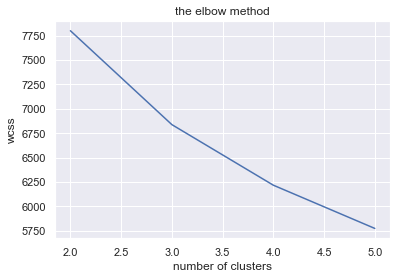

In [40]:
plt.plot(range(2,6),wcss)
plt.title("the elbow method")
plt.xlabel("number of clusters")
plt.ylabel("wcss")
plt.show()

In [41]:
#only wcss is not good enough to decide best num of clusters
##hence computing withinss/betweenss
##wss is provided  by .inertia_ property
##bss needs to be computed

In [42]:
km=KMeans(n_clusters=6)
km.fit(scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [43]:
centers=pd.DataFrame(km.cluster_centers_)

In [44]:
centers.columns=scaled.columns

In [45]:
centers

,Age,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Family_2,Family_3,Family_4,Education_2,Education_3
0,0.505395,0.296264,0.183922,0.086261,0.064000,0.081000,3.000000e-03,0.805000,0.086000,3.552714e-15,4.680000e-01,2.636780e-15,5.820000e-01,-3.941292e-15
1,0.504825,0.330826,0.209949,0.083952,0.045007,0.059072,-4.579670e-16,0.195499,0.563994,2.997602e-15,3.375527e-01,2.442491e-15,1.026723e-01,1.251758e-01
2,0.508013,0.256954,0.166554,0.075488,0.106092,0.073529,-4.926615e-16,0.616597,0.176471,3.497203e-15,2.247899e-01,3.718487e-01,4.773959e-15,1.000000e+00
3,0.507620,0.347671,0.217416,0.098729,0.070423,0.082850,-5.134781e-16,0.555924,0.279205,1.000000e+00,2.386980e-15,2.692291e-15,2.004971e-01,2.850041e-01
4,0.474211,0.228108,0.149344,0.077735,0.076433,0.100637,7.643312e-03,0.608917,0.289172,3.164136e-15,-6.106227e-16,1.000000e+00,5.235669e-01,-3.552714e-15
5,0.504008,0.453356,0.295171,0.147779,0.470990,0.491468,1.000000e+00,0.935154,0.805461,2.286689e-01,2.696246e-01,2.184300e-01,2.696246e-01,3.276451e-01


In [46]:
round(centers,3)

,Age,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Family_2,Family_3,Family_4,Education_2,Education_3
0,0.505,0.296,0.184,0.086,0.064,0.081,0.003,0.805,0.086,0.000,0.468,0.000,0.582,-0.000
1,0.505,0.331,0.210,0.084,0.045,0.059,-0.000,0.195,0.564,0.000,0.338,0.000,0.103,0.125
2,0.508,0.257,0.167,0.075,0.106,0.074,-0.000,0.617,0.176,0.000,0.225,0.372,0.000,1.000
3,0.508,0.348,0.217,0.099,0.070,0.083,-0.000,0.556,0.279,1.000,0.000,0.000,0.200,0.285
4,0.474,0.228,0.149,0.078,0.076,0.101,0.008,0.609,0.289,0.000,-0.000,1.000,0.524,-0.000
5,0.504,0.453,0.295,0.148,0.471,0.491,1.000,0.935,0.805,0.229,0.270,0.218,0.270,0.328


In [48]:
x=centers.iloc[0,:]
y=centers.iloc[1,:]

In [49]:
x

Age                   5.053953e-01
Income                2.962639e-01
CCAvg                 1.839220e-01
Mortgage              8.626142e-02
Personal Loan         6.400000e-02
Securities Account    8.100000e-02
CD Account            3.000000e-03
Online                8.050000e-01
CreditCard            8.600000e-02
Family_2              3.552714e-15
Family_3              4.680000e-01
Family_4              2.636780e-15
Education_2           5.820000e-01
Education_3          -3.941292e-15
Name: 0, dtype: float64

In [50]:
y

Age                   5.048245e-01
Income                3.308264e-01
CCAvg                 2.099494e-01
Mortgage              8.395185e-02
Personal Loan         4.500703e-02
Securities Account    5.907173e-02
CD Account           -4.579670e-16
Online                1.954993e-01
CreditCard            5.639944e-01
Family_2              2.997602e-15
Family_3              3.375527e-01
Family_4              2.442491e-15
Education_2           1.026723e-01
Education_3           1.251758e-01
Name: 1, dtype: float64